In [7]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from PIL import Image
from torchvision import transforms

In [11]:
def imshow(img, figsize):
    img = torch.tensor(img)
    
    # Preprocessing
    if len(img.shape) == 4:
        img = img[0]
    
    # Check if first or last element is three
    # Convert to shape H W 3
    if img.shape[0] == 3:
        img = img.permute(1,2,0)    
    assert img.shape[-1] == 3
    assert len(img.shape) == 3

    fig = plt.imshow(img, extent = (-0.5, figsize[0]-0.5, figsize[1]-0.5, -0.5))
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)


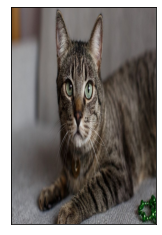

In [15]:
fname = 'cat.jpeg'
img = Image.open(fname)
tensorize = transforms.ToTensor()
img = tensorize(img)
imshow(img, figsize=(4,6))


In [20]:
import torchvision 
model = torchvision.models.resnet34(pretrained=True)
model.eval()
print("")



In [38]:
class TrainableImage(torch.nn.Module):
    def __init__(self,shape = (1, 3, 244, 244)):
        super().__init__()
        self.data = torch.nn.Parameter(torch.rand(shape))
    
    def forward(self):
        """
        This is the data that is passed to the neural networks (clipped),
         which is different from the actual data
        
        You don't actually care about self.data, but rather the the image that
         self.data "controls" or produces the output of the neural network
        """
        data = torch.maximum(self.data, torch.tensor([0.0]))
        data = torch.minimum(data, torch.tensor([1.0]))
        return data

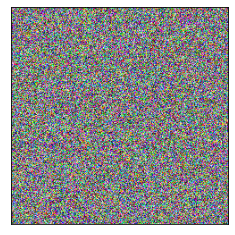

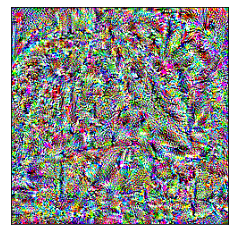

In [40]:
train_image = TrainableImage()
optimizer = torch.optim.Adam(train_image.parameters(), lr = 0.05)

steps = 100
imshow(train_image(), (16, 16))
plt.show()
for i in range(steps):
    optimizer.zero_grad()
    loss = model(train_image())[0,50]
    loss.backward()
    optimizer.step()

imshow(train_image(), (16, 16))
plt.show()





In [41]:
class SigmoidImage(torch.nn.Module):
    def __init__(self,shape = (1, 3, 244, 244)):
        super().__init__()
        self.data = torch.nn.Parameter(torch.randn(shape))
    
    def forward(self):
        """
        This is the data that is passed to the neural networks,
         which is different from the actual data
        
        You don't actually care about self.data, but rather the the image that
         self.data "controls" or produces the output of the neural network
        """
        return torch.sigmoid(self.data)


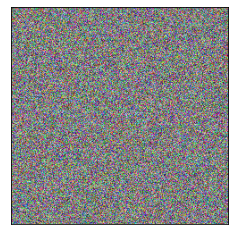

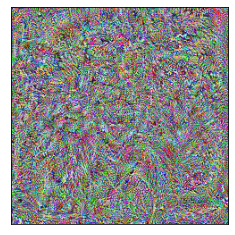

In [42]:
train_image = SigmoidImage()
optimizer = torch.optim.Adam(train_image.parameters(), lr = 0.05)

steps = 100
imshow(train_image(), (16, 16))
plt.show()
for i in range(steps):
    optimizer.zero_grad()
    loss = model(train_image())[0,50]
    loss.backward()
    optimizer.step()

imshow(train_image(), (16, 16))
plt.show()

In [45]:
import random
random.randint(0,1)

0

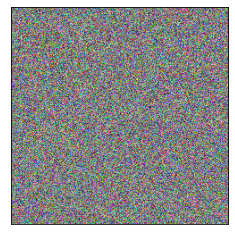

tensor(-1.4996)
tensor(-4.0736)
tensor(-6.4260)
tensor(-8.2725)
tensor(-9.9956)
tensor(-11.4476)
tensor(-12.8329)
tensor(-14.2085)
tensor(-15.3953)
tensor(-16.4930)
tensor(-17.6050)
tensor(-18.7074)
tensor(-19.7771)
tensor(-20.7354)
tensor(-21.7347)
tensor(-22.5649)
tensor(-23.4041)
tensor(-24.2750)
tensor(-25.0609)
tensor(-25.9107)
tensor(-26.6093)
tensor(-27.2825)
tensor(-27.8849)
tensor(-28.7325)
tensor(-29.4665)
tensor(-30.1328)
tensor(-30.7649)
tensor(-31.4041)
tensor(-32.0917)
tensor(-32.7590)
tensor(-33.3691)
tensor(-33.9794)
tensor(-34.5085)
tensor(-35.2318)
tensor(-35.7780)
tensor(-36.4245)
tensor(-36.8058)
tensor(-37.0810)
tensor(-37.8841)
tensor(-38.2992)
tensor(-38.8681)
tensor(-39.3772)
tensor(-39.9569)
tensor(-40.3878)
tensor(-40.9365)
tensor(-41.2935)
tensor(-41.7890)
tensor(-42.1793)
tensor(-42.5194)
tensor(-42.9974)
tensor(-43.3958)
tensor(-43.7728)
tensor(-44.2262)
tensor(-44.5947)
tensor(-44.9602)
tensor(-45.2178)
tensor(-45.5825)
tensor(-45.8940)
tensor(-46.1726)
te

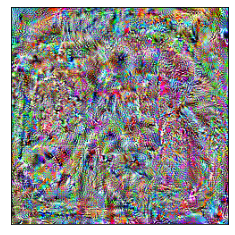

In [50]:
# Train SigmoidImage with jitter and other transformations

import random

train_image = SigmoidImage()
optimizer = torch.optim.Adam(train_image.parameters(), lr = 0.05)

steps = 1000
imshow(train_image(), (16, 16))
plt.show()
for i in range(steps):
    optimizer.zero_grad()

    # Transform/perturb image
    img = train_image()
    if random.randint(0,1) == 0:
        img = transforms.RandomRotation(degrees=40)(img)
    if random.randint(0,1) == 0:
        img = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.3)
    if random.randint(0,1) == 0:
        img = transforms.RandomAffine(0, translate=(0.5, 0.5))

    loss = model(train_image())[0,50]
    # print(loss.detach())
    loss.backward()
    optimizer.step()

imshow(train_image(), (16, 16))
plt.show()

In [55]:
class FourierImage(torch.nn.Module):
    def __init__(self,shape = (1, 3, 244, 113, 2)):
        super().__init__()
        self.data = torch.nn.Parameter(torch.randn(shape))
        self.scale = torch.nn.Parameter(torch.tensor(100.))
    
    def forward(self):
        """
        This is the data that is passed to the neural networks,
         which is different from the actual data
        
        You don't actually care about self.data, but rather the the image that
         self.data "controls" or produces the output of the neural network
        """
        out = torch.fft.irfft2(torch.view_as_complex(self.data))
        out = self.scale * out
        return torch.sigmoid(out)

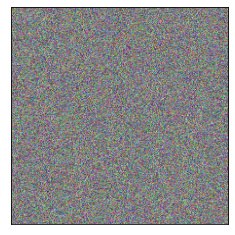

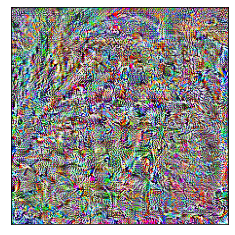

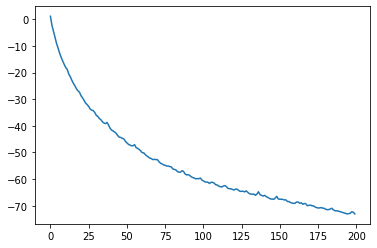

In [61]:
# Train SigmoidImage with jitter and other transformations

import random

train_image = FourierImage()
optimizer = torch.optim.Adam(train_image.parameters(), lr = 0.3)

losses = []

steps = 200
imshow(train_image(), (16, 16))
plt.show()
for i in range(steps):
    optimizer.zero_grad()

    # Transform/perturb image
    img = train_image()
    if random.randint(0,1) == 0:
        img = transforms.RandomRotation(degrees=40)(img)
    if random.randint(0,1) == 0:
        img = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.3)
    if random.randint(0,1) == 0:
        img = transforms.RandomAffine(0, translate=(0.5, 0.5))

    loss = model(train_image())[0,50]
    losses.append(loss.detach().item())
    loss.backward()
    
    optimizer.step()

imshow(train_image(), (16, 16))
plt.show()

plt.plot(losses)

In [ ]:
class FourierImage(torch.nn.Module):
    def __init__(self,shape = (1, 3, 244, 113, 2)):
        super().__init__()
        self.data = torch.nn.Parameter(torch.randn(shape))
        self.scale = torch.nn.Parameter(torch.tensor(100.))

        height = shape[2]
        width = shape[3]
        fy = torch.fft.fftfreq(height)
        fx = torch.fft.fftfreq(width)
        # self.factor shape: 244, 113
        # self.factor[i][j] = 1/torch.sqrt(fx**2 + fy**2)
        #  where fy = torch.fft.fftfreq(height)[i]
        #    and fx = torch.fft.fftfreq(width)[j]

        # Turn fy shape 224, 1
        fy = fy.unsqueeze(1)
        self.register_buffer('factor', 1/torch.sqrt(fx**2 + fy**2))
        self.factor[0, 0] = 1/height

        # Shape of self.data: 1,3,244,113,2
        # Shape of self.factor: 224,113
        # Unsqueeze self.factor at the end so we can broadcast it with self.data
        # New self.factor shape: 224,113,1
        self.factor = self.factor.unsqueeze(2)
    
    def forward(self):
        """
        This is the data that is passed to the neural networks,
         which is different from the actual data
        
        You don't actually care about self.data, but rather the the image that
         self.data "controls" or produces the output of the neural network
        """
        out = self.data/self.factor
        out = torch.fft.irfft2(torch.view_as_complex(out))
        out = self.scale * out
        return torch.sigmoid(out)